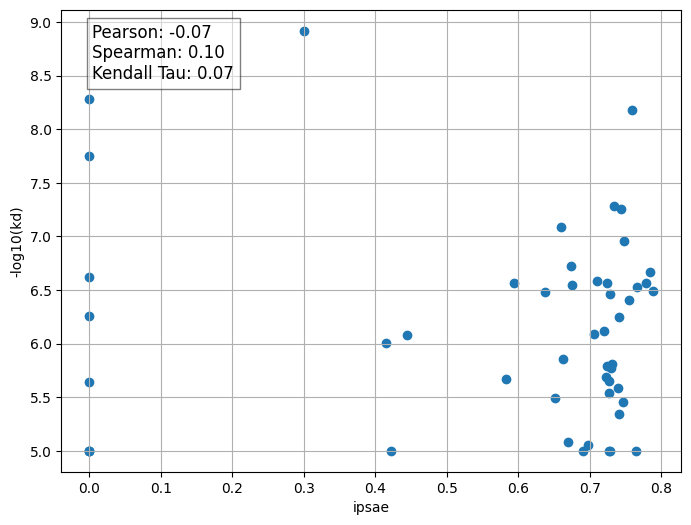

In [ ]:
# Now we will first calculate the correlation between kd and ipsae. Plot a scatterplot, and calculate the pearson, spearman and kendall.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

results_df = pd.read_csv("results_with_ipsae.csv")
# Remove rows without Kd or ipsae values.
df_filtered = results_df.dropna(subset=['kd'])
df_filtered = df_filtered.dropna(subset=['ipsae'])

# Compute -log10(kd)
df_filtered['neg_log10_kd'] = -np.log10(df_filtered['kd'])

# Compute correlations
pearson_corr, _ = stats.pearsonr(df_filtered['neg_log10_kd'], df_filtered['ipsae'])
spearman_corr, _ = stats.spearmanr(df_filtered['neg_log10_kd'], df_filtered['ipsae'])
kendall_tau, _ = stats.kendalltau(df_filtered['neg_log10_kd'], df_filtered['ipsae'])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['ipsae'], df_filtered['neg_log10_kd'])
plt.xlabel('ipsae')
plt.ylabel('-log10(kd)')


text_str = f"Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}\nKendall Tau: {kendall_tau:.2f}"
plt.annotate(text_str, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12,
             bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True)
plt.show()

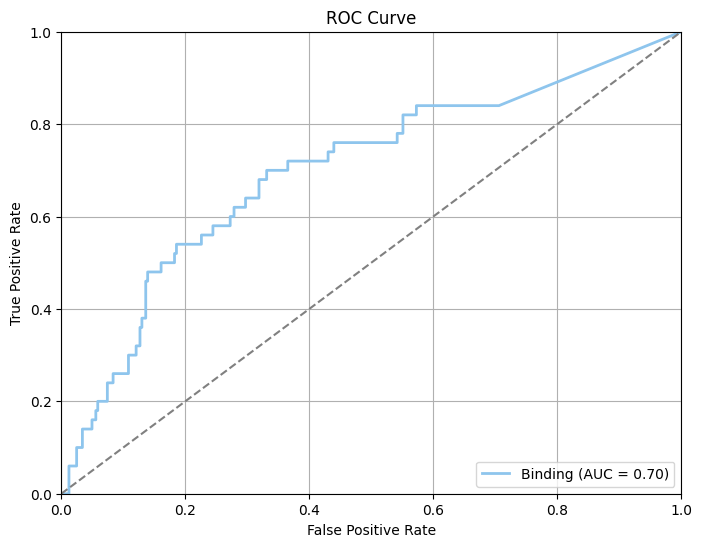

In [4]:
from sklearn.metrics import roc_curve, auc

df = pd.read_csv("results_with_ipsae.csv")
df_filtered = df[df['binding'] != 'unknown']
df_filtered = df_filtered.dropna(subset=['ipsae'])
df_filtered['binding_numeric'] = df_filtered['binding'].map({'true': 1, 'false': 0})

fpr, tpr, _ = roc_curve(df_filtered['binding_numeric'], df_filtered['ipsae'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#8ec5ed", lw=2, label=f'Binding (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()


For reference, the ROC curves for iPAE, iPTM, and ESM PLL are shown here
![roc_curvs](rocs.png)